# How Do Property Characteristics Like Type, Size, and Location Impact Their Market Prices in Pakistan?

<center><img src="house_islamabad.png" alt="Houses" /><center>

In this project, I will explore how different property attributes affect the real estate market prices in Islamabad, Pakistan. The [dataset](https://www.gigasheet.com/sample-data/house-prices-2023-dataset) contains information on the type of property, its size, location, the number of bedrooms, and bathrooms. Understanding the dataset can give useful insights for buyers, sellers, and those interested in market trends to invest or make informed decisions. 

In [1]:
# Import requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Read the csv file
house_prices = pd.read_csv('house_prices.csv')
house_prices.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


## Overview of the Dataset

In [2]:
# Suppress scientific notation and get the overview of the Dataset
pd.options.display.float_format = '{:.0f}'.format

house_prices.describe()

,Unnamed: 0,price,baths,bedrooms,Area_in_Marla
count,99499,99499,99499,99499,99499
mean,78884,10375919,4,3,9
std,48239,10659998,1,1,7
min,0,15500,1,0,0
25%,37236,150000,2,2,5
50%,76065,7500000,3,3,7
75%,119402,15500000,5,4,10
max,168445,44900000,7,6,194


1. Count: The dataset contains 99,499 records.
2. Price: 
    - The average (mean) price of a property is around 10,375,919 PKR. <br>
    - The standard deviation is around 10,659,998, demonstrating a broad range of property values. <br>
    - The lowest price is 15,500, with a maximum of 44,900,000.
    - The 25th percentile (first-half median) is 150,000, the 50th percentile (median) is 7,500,000, and the 75th percentile (second-half median) is 15,500,000. 



## Data Cleaning

In [3]:
# 1. Remove the unnecessary 'Unnamed: 0' column
house_prices.drop(columns=['Unnamed: 0'], inplace=True)
# 2. Remove entries where 'bedrooms' or 'Area_in_Marla' have a value of 0
house_prices = house_prices[(house_prices['bedrooms'] != 0) & (house_prices['Area_in_Marla'] != 0)]
# 3. Rename Area_in_Marla and convert it to Area in square meters
house_prices.rename(columns={'Area_in_Marla': 'Area_in_SqM'}, inplace=True)
house_prices['Area_in_SqM'] = house_prices['Area_in_SqM'] * 25.29
# 4. Convert the 'price' column from PKR to EUR
house_prices['price_EUR'] = house_prices['price'] / 306.95
# 5. Create a new column for Price per square meter
house_prices['Price_per_SqM'] = house_prices['price_EUR'] / house_prices['Area_in_SqM']
house_prices.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_SqM,price_EUR,Price_per_SqM
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,101,32579,322
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,142,22479,159
2,House,16500000,G-15,Islamabad,6,For Sale,5,202,53755,266
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,1012,141717,140
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,202,22805,113


The data cleaning process started with removing an index column with no significant data for analysis. Then, there were bedrooms and areas with a value of 0. Since a home is assumed to have at least one bedroom and a non-zero area, it was decided to remove such entries. Next, to simplify interpretation, the area was changed from Marlas, Pakistan's traditional measurement unit of area, to square meters. Similarly, the price was changed from Pakistani Rupees to Euros for a more comprehensive financial understanding. Lastly, I introduced a price per square meter metric to compare city prices. 

In [4]:
# 5. Check for the missing values
missing_val = house_prices.isnull().sum()
# 6. Check data types
data_types = house_prices.dtypes
missing_val, data_types

(property_type    0
 price            0
 location         0
 city             0
 baths            0
 purpose          0
 bedrooms         0
 Area_in_SqM      0
 price_EUR        0
 Price_per_SqM    0
 dtype: int64,
 property_type     object
 price              int64
 location          object
 city              object
 baths              int64
 purpose           object
 bedrooms           int64
 Area_in_SqM      float64
 price_EUR        float64
 Price_per_SqM    float64
 dtype: object)

## Price Distribution Analysis

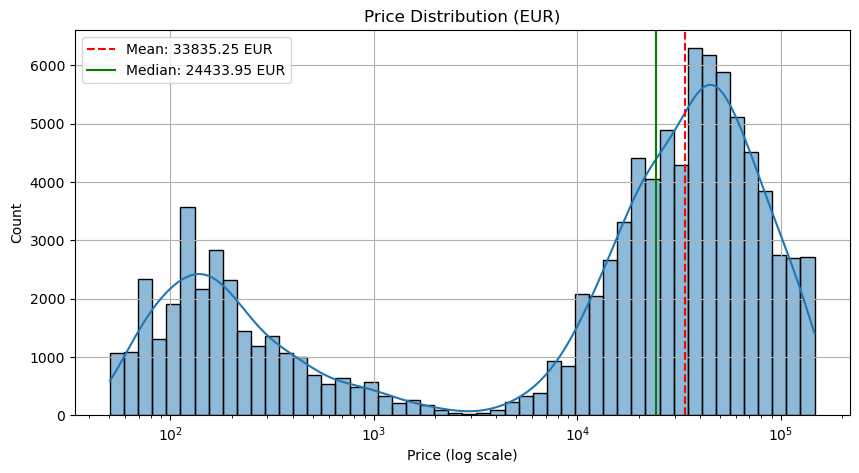

In [5]:
plt.figure(figsize=(10, 5))

# Use log scale if the range is wide 
if (house_prices['price_EUR'] > 0).all():
    sns.histplot(data=house_prices, x='price_EUR', kde=True, log_scale=True, bins=50)
    plt.xscale('log')
    plt.xlabel('Price (log scale)')
else:
    sns.histplot(data=house_prices, x='price_EUR', kde=True, bins=50)
    plt.xlabel('Price')

# Add annotations for mean and median
mean_price = house_prices['price_EUR'].mean()
median_price = house_prices['price_EUR'].median()
plt.axvline(mean_price, color='r', linestyle='--', label=f'Mean: {mean_price:.2f} EUR')
plt.axvline(median_price, color='g', linestyle='-', label=f'Median: {median_price:.2f} EUR')

plt.title('Price Distribution (EUR)')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

The histogram shows the distribution of home prices in EUR on a logarithmic scale, which allows it to accommodate an extensive range of values. The distribution is skewed to the right, as the mean exceeds the median. The mean price, denoted by a red dashed line, is significantly higher than the median (green solid line). This implies that high-value properties are raising the average, probably due to exceptional characteristics such as size or location. The histogram's Kernel Density Estimate (KDE) curve emphasizes the skewness and gives a smooth overview of pricing probability. 

## Impact of Property Type on Price

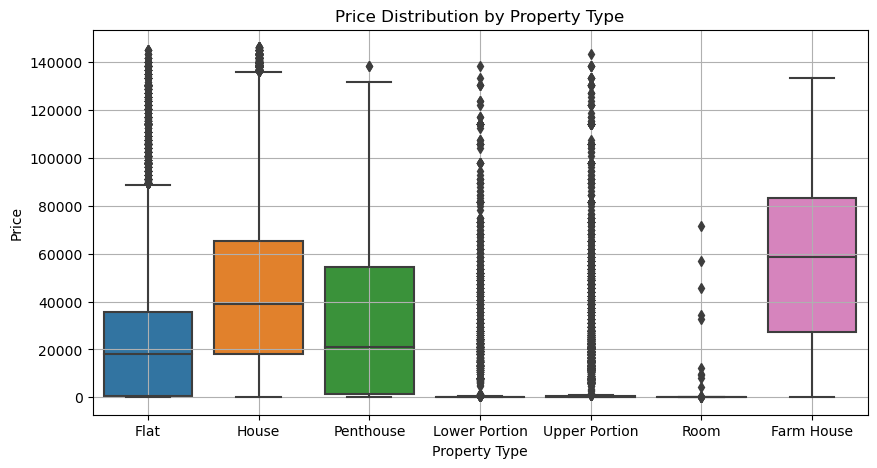

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='property_type', y='price_EUR', data=house_prices)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The boxplot graphically depicts the relationship between property type and market prices in Euros (EUR). The line within the boxes, representing the median, gives us a general picture of the median prices across various property types. The lowest median price is for flats, while the highest corresponds to farmhouses. Interestingly, the property types, such as lower portion, upper portion, and room, do not have any large visible boxes, which could be because of a relatively small number of entries for these types. Flats have a narrower price range, while Houses, Penthouses, and farmhouses have a more comprehensive price range, showing the diversity in location, size, and amenities. 

## Size and Price Correlation

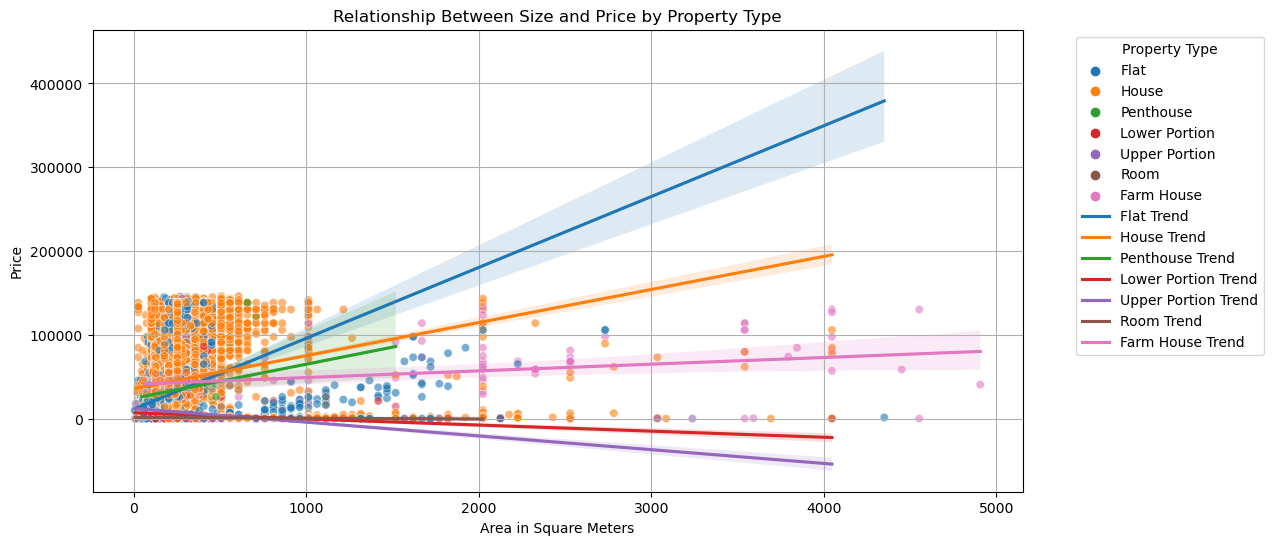

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area_in_SqM', y='price_EUR', data=house_prices, hue='property_type', alpha=0.6)
# Get unique property types
property_types = house_prices['property_type'].unique()

# Loop through property types and add a regression line for each
for property_type in property_types:
    # Subset the data to each property type
    subset = house_prices[house_prices['property_type'] == property_type]
    sns.regplot(
        x='Area_in_SqM', 
        y='price_EUR', 
        data=subset,
        scatter=False,  # Do not plot the individual points again
        label=f'{property_type} Trend',  # Label for the legend
    )
plt.title('Relationship Between Size and Price by Property Type')
plt.xlabel('Area in Square Meters')
plt.ylabel('Price')
plt.grid(True)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The scatter plot above demonstrates the association between Area (in square meters) and price (in EUR) across multiple property types. Regression lines for each property type have also been included to show the overall trends. Generally, the plot demonstrates a positive correlation: as the Area increases, so do the prices. The regression line for each property type displays the trend for that property type. Flats, Houses, Penthouses, and farmhouses have steep positive slopes, which indicate a stronger correlation between price and Area for these properties. In contrast, Lower and Upper portion types represent negative slopes, which correlate negatively. Lastly, Rooms have a weak positive correlation. The scatter of points is concentrated in the 0 - 1000 area range, which is expected. 

## Bedrooms and Bathrooms Influence on Price

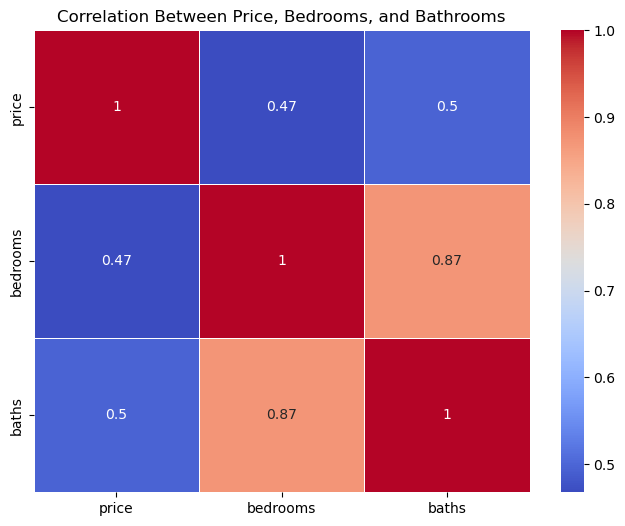

In [8]:
# Analysis 4: Bedrooms and Bathrooms Influence on Price
correlation_matrix = house_prices[['price', 'bedrooms', 'baths']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=.5)
plt.title('Correlation Between Price, Bedrooms, and Bathrooms')
plt.show()

The correlation matrix for the price, number of bedrooms, and number of bathrooms in the property types is displayed in the heatmap above. Bedrooms and baths moderately influence prices, with correlation values of 0.47 and 0.5, respectively. While having more bedrooms and baths might increase the value of a property, it is not the only or most important element. This suggests that other aspects may be more critical in deciding the pricing of a property.

## Average Price per Square Meter in Cities

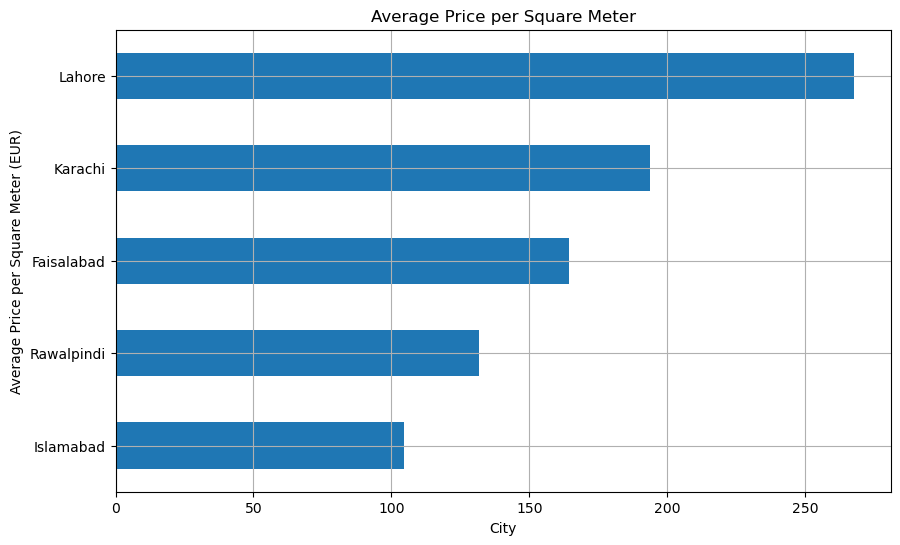

city
Islamabad    105
Rawalpindi   132
Faisalabad   164
Karachi      194
Lahore       268
Name: Price_per_SqM, dtype: float64

In [9]:
# Calculating the average Price_per_SqM for each of cities
average_price_per_sqm_cities = house_prices.groupby('city')['Price_per_SqM'].mean().sort_values(ascending=True)

# Creating the revised visualization
plt.figure(figsize=(10, 6))
average_price_per_sqm_cities.plot(kind='barh')
plt.title('Average Price per Square Meter')
plt.xlabel('City')
plt.ylabel('Average Price per Square Meter (EUR)')
plt.grid(True)
plt.show()

# Displaying the revised average prices for verification
average_price_per_sqm_cities

The bar chart displays the average price per square meter in Euros (EUR) for the five cities represented in the dataset. The highest average price per square meter is in Lahore, with 268 EUR per square meter. The lowest average price is in Islamabad, with 105 EUR per square meter. Although Islamabad is the country's capital, and one expects that the prices will be the highest here, it is only the 9th by population, while Karachi and Lahore are the 1st and 2nd, respectively (see Table below). This might explain Islamabad's last position regarding the average price per square meter. 

In [10]:
from bs4 import BeautifulSoup
import requests
# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_cities_in_Pakistan_by_population'
# Classes for the table
table_classes = ['wikitable', 'sortable', 'jquery-tablesorter']
# Fetch the page
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
# Find the table
population_table = soup.find('table', {'class':table_classes})
# Convert the table to DataFrame
df = pd.read_html(str(population_table)) [0]
# Clean column names by removing text within brackets
df.columns = df.columns.str.replace(r"\[.*\]", "", regex=True)
# Display the top 10 cities without the index
print(df.head(10).to_string(index=False))

Rank       City  Population (2017 Census)  Population (1998 Census)   Change           Province
   1    Karachi                  14916456                   9339023  +59.72%              Sindh
   2     Lahore                  11126285                   5209088 +113.59%             Punjab
   3 Faisalabad                   3204726                   2008861  +59.53%             Punjab
   4 Rawalpindi                   2098231                   1409768  +48.84%             Punjab
   5 Gujranwala                   2027001                   1132509  +78.98%             Punjab
   6   Peshawar                   1970042                    982816 +100.45% Khyber Pakhtunkhwa
   7     Multan                   1871843                   1197384  +56.33%             Punjab
   8  Hyderabad                   1734309                   1166894  +48.63%              Sindh
   9  Islamabad                   1009832                    529180  +90.83%          Islamabad
  10     Quetta                   100120